# Grouping data

A single pandas DataFrame can often be decomposed into smaller subsets of data that need to be visualized.  One of the key advantages of <b>fivecentplots</b> is its incredibly easy syntax to isolate data sets based on other columns in a DataFrame.  The following grouping options are available:

* ``filter``: simple string which a more convenient syntax than standard ``numpy`` filtering used to select only DataFrame rows which meet certain criteria

* ``legend``: color lines and markers according to unique values in a DataFrame column

* ``groups``:
    * for xy plots: separates unique subsets of data so that plot lines are not continuously looped back to the origin (useful for replicates of similar data)
    * for boxplots: groups boxes by unique values in one or more DataFrame columns

* ``row``: makes a grid of subplots with each unique value of a single DataFrame column grouped in rows in a single column; group labels are on the right side of each plot

* ``col``: makes a grid of subplots with each unique value of a single DataFrame column grouped in columns in a single row; group labels are on the top of each plot

* ``wrap``: 
    * Option 1: similar to row and column grouping, makes a grid of subplots for each <i>unique value</i> of one or more the DataFrame column names; group labels and values are on top of each plot
    * Option 2: wrap by `x` or `y` to create a uniqe subplots for each <i>column name</i> listed

* ``figure``:  makes a unique figure for each unique value of a DataFrame column

.. note:: We can achieve an extra grouping dimension using the kwarg ``filter`` followed by a string matching DataFrame column names with values (``filter='Column1==5 & Column2>3'``)

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path

Read some dummy data for examples:

In [2]:
df1 = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
df2 = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_box.csv')

Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## filter

Consider the following set of fake current vs voltage data, which comes from multiple samples at multiple conditions:

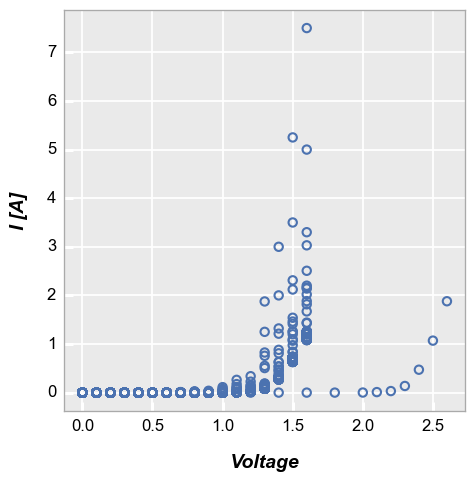

In [4]:
fcp.plot(df1, x='Voltage', y='I [A]', lines=False)

To isolate these data to particular subsets of interest we need to filter the original data set.  Because our data comes from pandas DataFrames, this is fairly straight forward as shown below.  However, depending on how our DataFrame columns are named, the syntax could get ugly quickly:

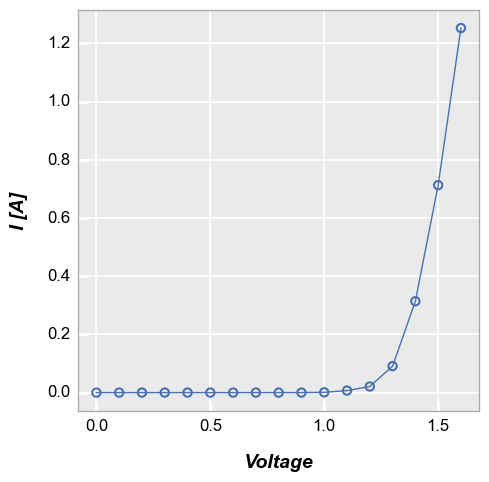

In [ ]:
fcp.plot(df1[(df1.Substrate=='Si')&(df1['Target Wavelength']==450)&(df1['Boost Level']==0.2)&(df1['Temperature [C]']==25)&(df1['Die']=='(1,1)')],
         x='Voltage', y='I [A]')

For convenience, **fivecentplots** provides an alternate filtering syntax which allows the user to specify matching criteria is a more human-readable way.  Here we apply the same filter as above using this option:

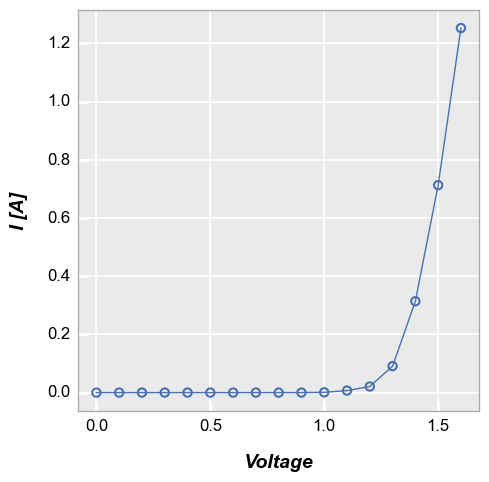

In [6]:
fcp.plot(df1, x='Voltage', y='I [A]',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(1,1)"')

This new syntax also allows for more complicated filter schemes to be easily defined:

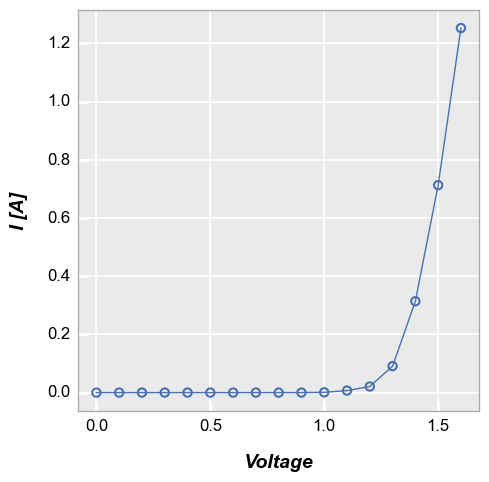

In [7]:
fcp.plot(df1, x='Voltage', y='I [A]',
         filter='Substrate not in ["GaAs", "InP"] & Target Wavelength <= 455 & Boost Level==0.2 & Temperature [C]==25 & Die in ["(1,1)"]')

## legend

The `legend` keyword can be a single DataFrame column name or a list of column names.  The data set will then be grouped according to each unique value of the `legend` column(s) and a separate plot line will be added to the figure for each group.  A different color and marker type will be used for better visualization.

### Single legend column

In our sample data set, we have fake IV data for various devices, each labeled with a unique "Die" address.  By setting the kwarg ``legend='Die'``, we can separate the data set for each test site and display it clearly:

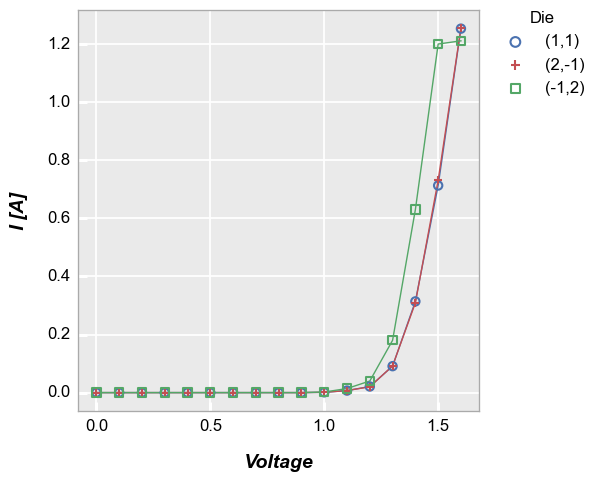

In [8]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple legend columns

We can also legend by multiple DataFrame columns.  In this case, we pass a list of column names is passed to the `legend` keyword and get a result where the unique combination of values of each legend column is listed, separated by a pipe character (|):

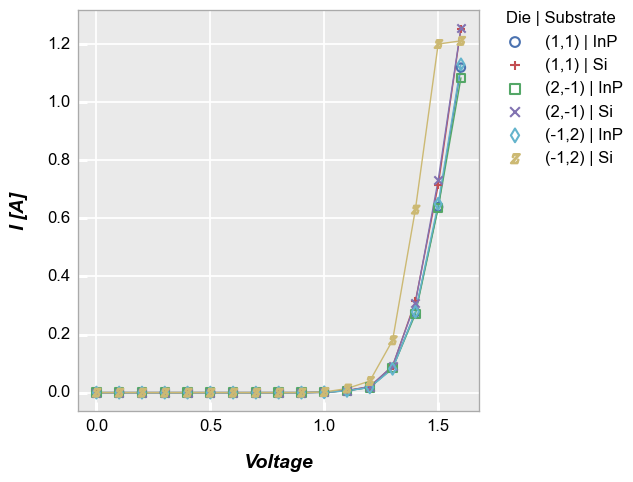

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', legend=['Die', 'Substrate'],
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple x & y values 

Legends are also useful when plotting more than one DataFrame column on the y axis <i>without a specific grouping column</i>. The legend shows automatically in this case to identify which data set below to which DataFrame column, but can be disabled by setting `legend=False`:

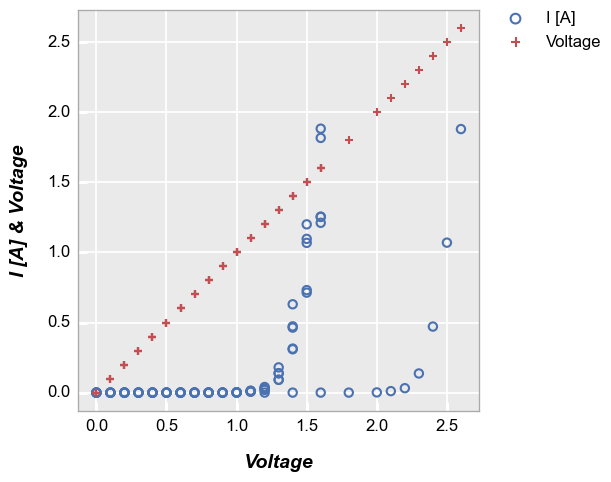

In [ ]:
fcp.plot(df1, x='Voltage', y=['I [A]', 'Voltage'], lines=False,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

### Secondary x|y plots

When plotting with a secondary axis (i.e., twinning), there are three options for the legend: (1) no legend; (2) legend based on the values of the primary/secondary axes; or (3) legend based on another column.

#### No legend

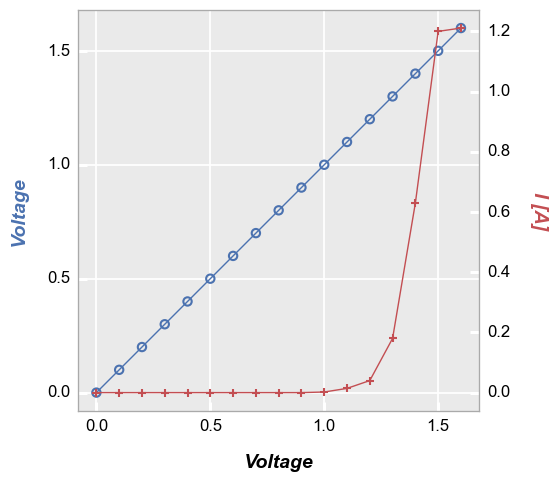

In [ ]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

#### With legend

Force the legend to show with kwarg ``legend=True``:

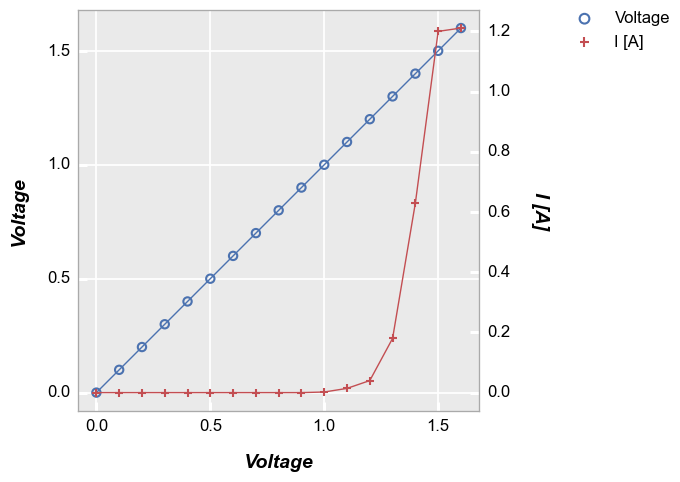

In [ ]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

#### Legend by another column

Legend by the name of another DataFrame column (each value in the legend will also state if it is linked to the primary or secondary axis):

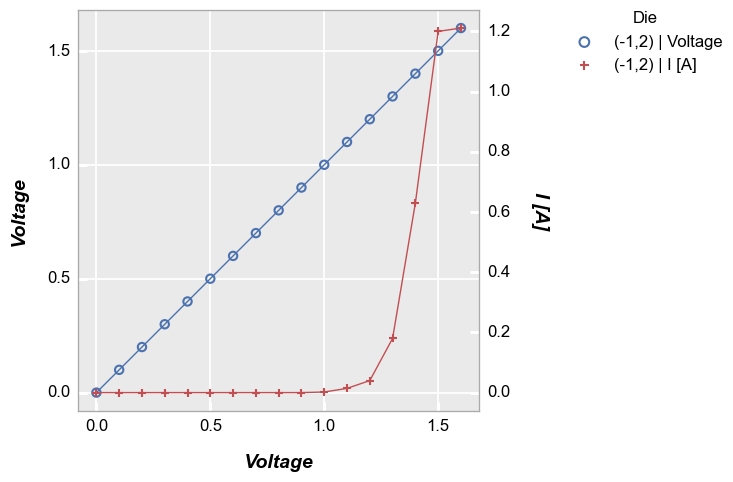

In [ ]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

### Location

By default, <b>fivecentplots</b> places the legend in the upper right corner of a figure, outside of the plot axes as this is the only way to be certain the legend will never obscure the actual data.  However, the legend can be placed inside the axes area by specifying the keyword `legend_location` with one of the following values (which align roughly with `matplotlib` syntax):

* 'outside' or 0

* 'upper right' or 1
                   
* 'upper left' or 2

* 'lower left' or 3

* 'lower right' or 4

* 'right' or 5

* 'center left' or 6

* 'center right' or 7

* 'lower center' or 8

* 'upper center' or 9

* 'center' or 10

* 'below' or 11

#### Outside right

No ``legend_location`` is required to place the legend to the right of the axes area.  This is the default for **fivecentplots**, completely eliminating the need for the complex syntax required to do this with other plotting solutions (like ``bbox_to_anchor`` with pure ``matplotlib`` code).  "Everything... in its right place"

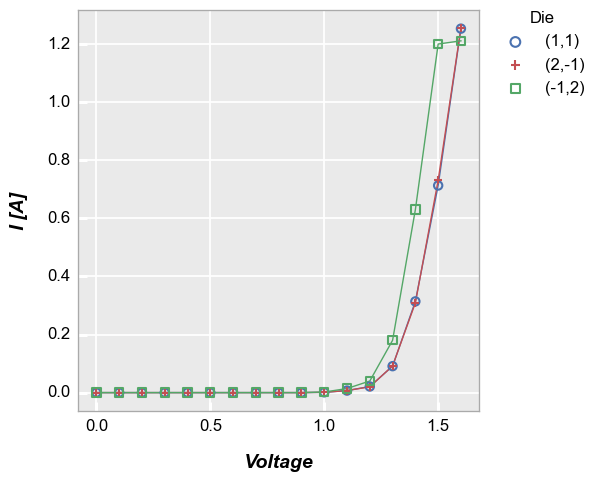

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

#### Inside the plot

Locations 1 through 10 will place the legend within the plot window.  While this can result in a more compact figure, there is a also a significant risk that the legend will obscure the data in the plot.  Care should be exercised when placing the legend inside the plot.

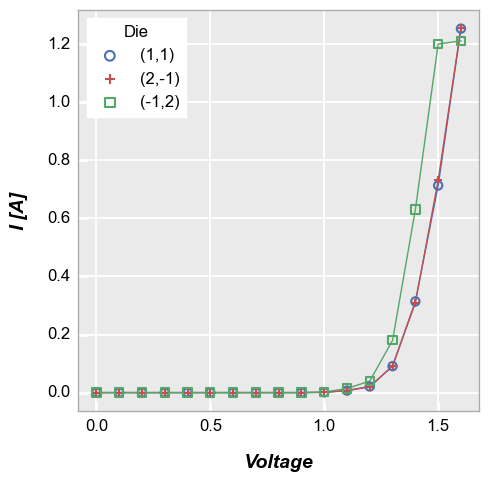

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', legend_location=2)

#### Below the plot

Long legend values can by annoying to deal with.  If the legend is placed in the default location outside the axis, the figure size will have a large width.  If the legend is placed within the axis window, it can extend longer than the axis itself.  <b>fivecentplots</b> also provides the option of placing the legend "below" the plot to deal with this case:

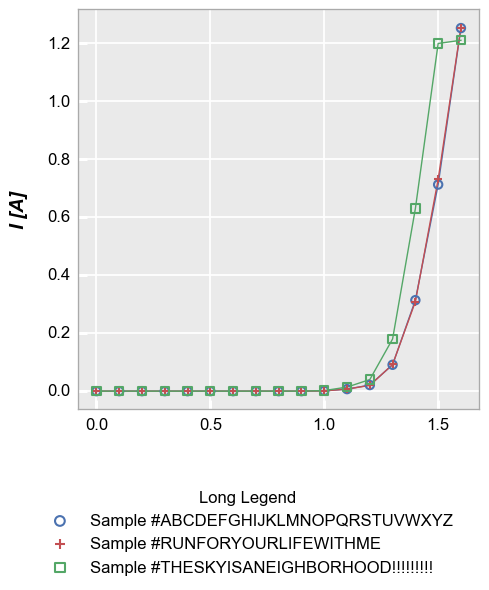

In [ ]:
df1.loc[df1.Die=='(1,1)', 'Long Legend'] = 'Sample #ABCDEFGHIJKLMNOPQRSTUVWXYZ'
df1.loc[df1.Die=='(2,-1)', 'Long Legend'] = 'Sample #RUNFORYOURLIFEWITHME'
df1.loc[df1.Die=='(-1,2)', 'Long Legend'] = 'Sample #THESKYISANEIGHBORHOOD!!!!!!!!!'
fcp.plot(df1, x='Voltage', y='I [A]', legend='Long Legend',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', legend_location='below')

#### Note on location

.. note:: Relocating the legend is straightforward when dealing with a single plot axes, but the ideal situation is a bit murky for grid plots with legends.  For the default ``legend_location`` on the outside right of the axes area there is no issue:  one legend will be placed in this space for all subplots.  When placing the legend inside the axes area however, a duplicate of the legend will be placed in *each* subplot window unless keyword ``nleg=1`` is included, which will enable the legend only within the upper right subplot.

## groups

Kwarg ``groups`` adds another level of grouping to a plot.  This keyword requires a DataFrame column name or list of column names which are used to identify subsets in the data and make sure they are properly distinguished in the plot.  This option behaves differently for xy plots and boxplots as described below.

### xy plots

Some data sets contain multiple sets of similar data (think replicates of a measurement or a large quantity of parts in a production line).  Consider the following example where we plot fake measurement data from a large sampling of parts with ``lines`` enabled.  Notice how the line loops from the end of the data back to the beginning repeatedly.  This occurs because the arrays used for the plot come from a DataFrame which has results for multiple parts concatenated together.  Without any additional information provided, it is not possible to know if these data are from one part or multiple parts.

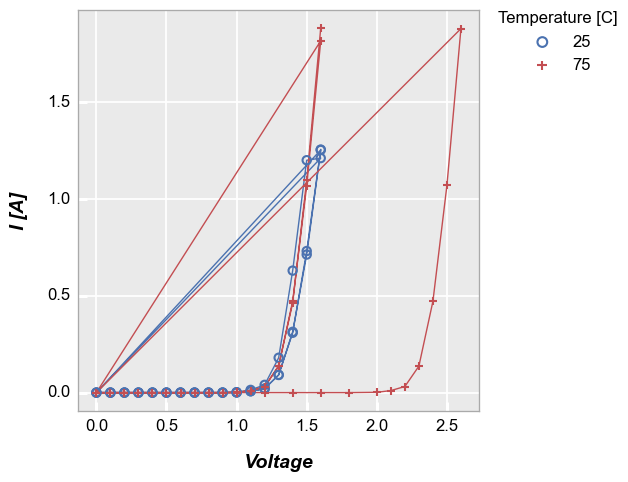

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Temperature [C]',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

To handle cases like this, we can add the keyword `groups` and specify another DataFrame column name that tells **fivecentplots** how the data are separated within the table (in this case we use the column "Die" which has an unique x,y address for each part).  Now we get distinct lines for each instance of the measurement data and we can clearly tell one part from another.  Unlike with ``legend`` however we do not know which part is which.  

.. note:: The `groups` keyword can also be combined with a legend from a different DataFrame column

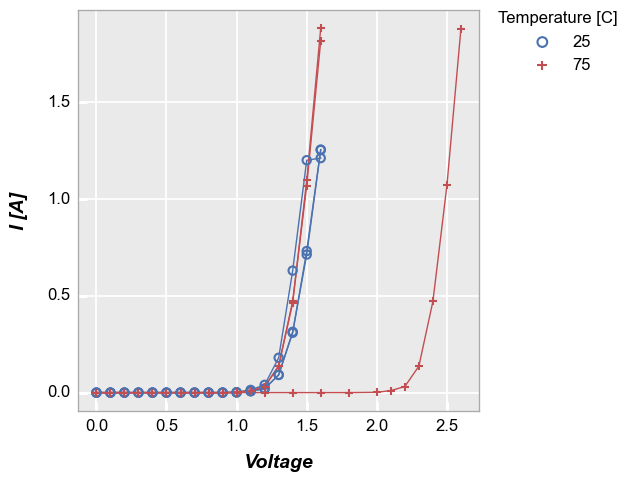

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', groups='Die', legend='Temperature [C]',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

`groups` also supports multiple column names.  Here we remove "Temperature [C]" from the ``legend`` and add it to the list of ``groups``:

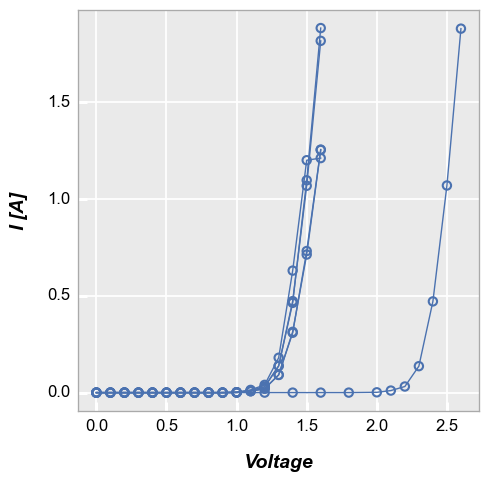

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', groups=['Die', 'Temperature [C]'],
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

### boxplots

Like x-y plots, the `groups` keyword is used to break the data set into subsets.  However, for boxplots the group column names and values are actually displayed along the x-axis.  This style mimics the incredibly useful variability gauge charts found in JMP:

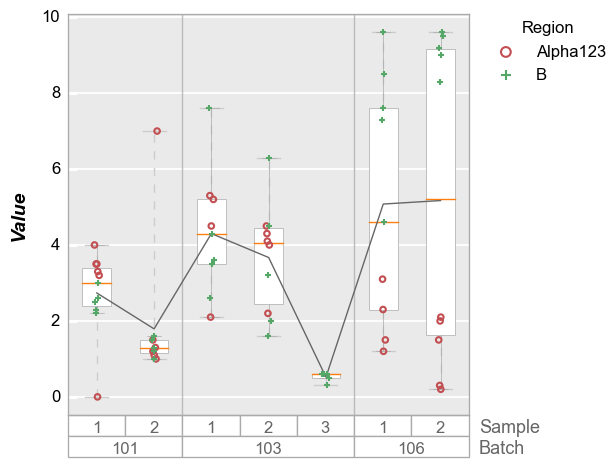

In [20]:
fcp.boxplot(df2, y='Value', groups=['Batch', 'Sample'], legend='Region')

## row | col subplots

### By unique values

For deeper analysis of our data, we can make a grid of subplots based on the unique values within DataFrame columns <i>other than the</i> ``x`` <i>and</i> ``y`` <i>columns we are plotting</i>.  In this case, we remove the "Temperature [C]" and "Boost Level" columns from our ``filter`` and add them to the ``row`` and ``column`` kwargs, respectively.  For our example data, there are three unique values of "Boost Level" and three unique values of "Temperature [C]" which leads to a 3x3 grid of subplots.  Each row in the plot corresponds to one of the 3 unique values of "Temperature [C]".  Likewise, each column in the plot corresponds to one of the 3 unique values of "Boost Level".  The specific value in each row and column are shown in labels to the right and above of the subplots, respectively.  

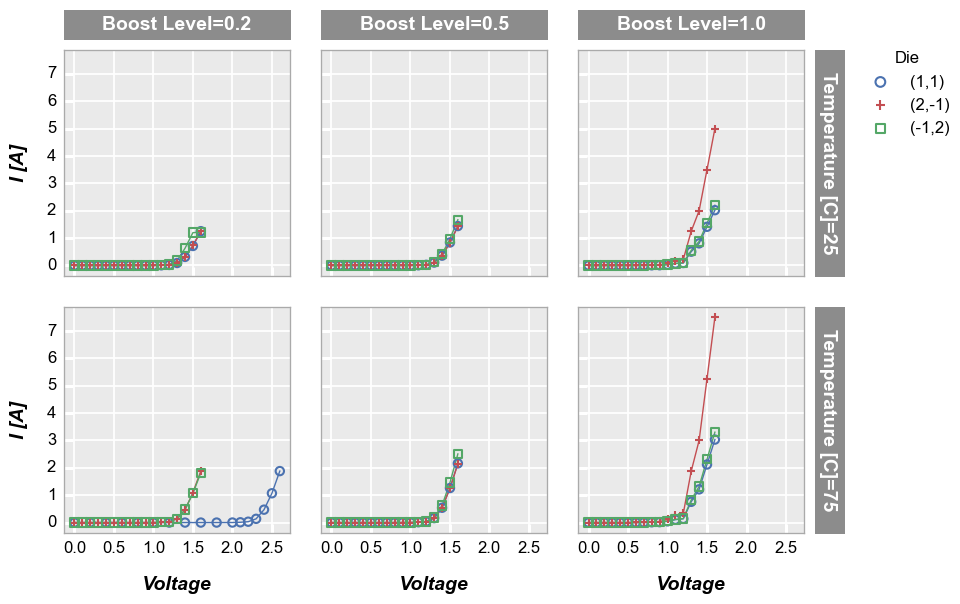

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]',
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=14)

### By x or y

Alternatively, we can use row and column grids to compare different ``x`` or ``y`` values.  For example, we can plot two different DataFrame columns on our y-axis (one per row) by adding the keyword ``row='y'``.  Each column in this plot shares the same x-axis variable:

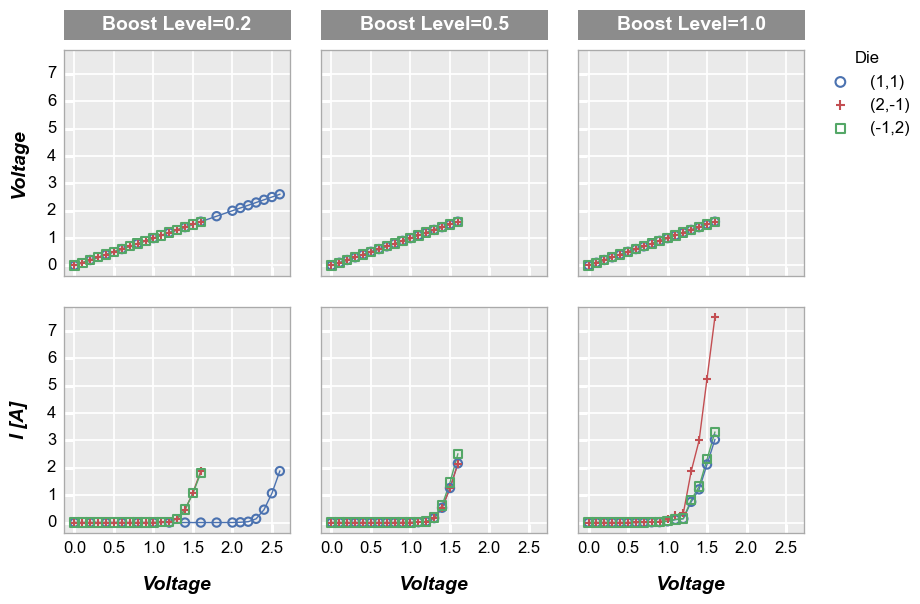

In [ ]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], legend='Die', col='Boost Level', row='y', ax_size=[225, 225],
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==75', label_rc_font_size=14)

We can make a similar plot with common `row` values and different x-axes by setting `col='x'`:

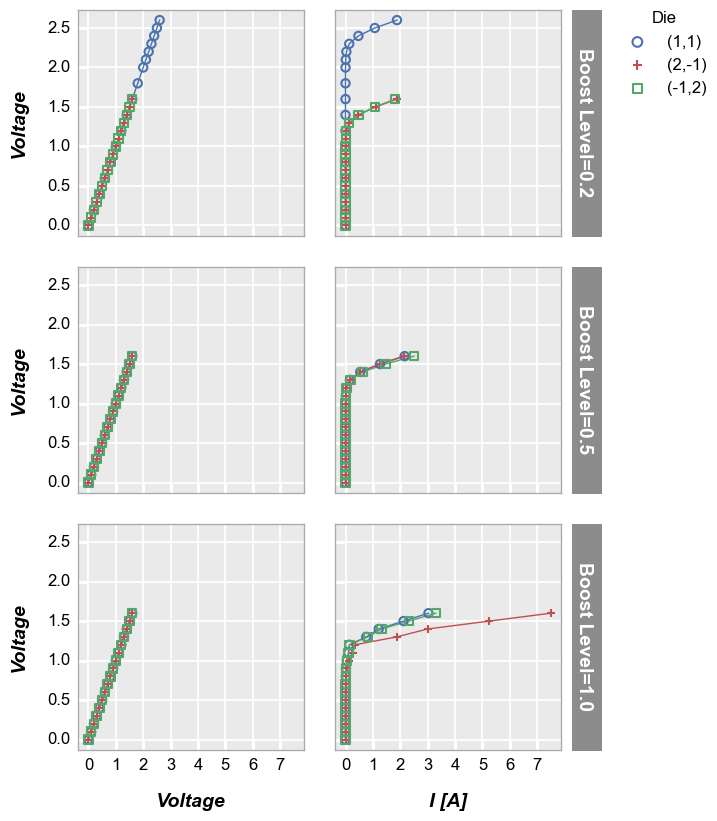

In [ ]:
fcp.plot(df1, x=['Voltage', 'I [A]'], y='Voltage', legend='Die', row='Boost Level', col='x',
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==75', label_rc_font_size=14)

## wrap subplots

### By unique values

The ``wrap`` keyword also allows us to create a grid of subplots.  Unlike ``row`` and ``col`` plots, ``wrap`` plots simply "wrap" a series of data subsets, each with the unique values of one or more DataFrame, into a grid.  There is no alignment of a common value across rows or column.  Additionally, ``wrap`` plots remove the spacing and ticks between subplots by default for a tighter grid (this can be changed via keywords), axis sharing is forced (this cannot be changed), and the ``row``|``column`` value labels are condensed to a single label above each subplot:

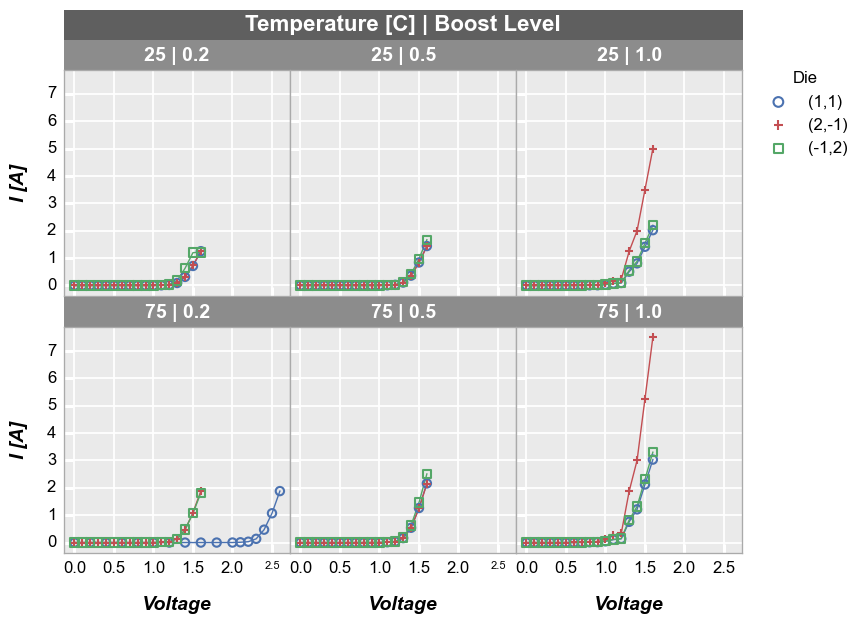

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'],
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450')

By default, ``wrap`` subplots will be arranged in a the closest thing to a square grid as possible.  If the number of subplots does not match a perfectly square grid, the last row will have one or more empty spaces in the grid.  To override the default grid size, use the keyword ``ncol`` to sets a custom number of columns.  The number of rows will be automatically determined based on the total number of subplots:

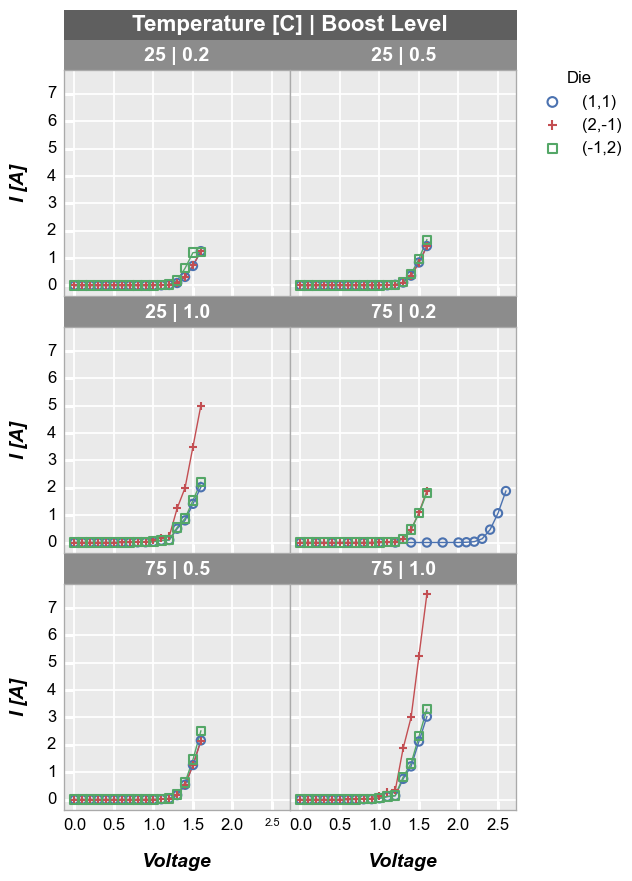

In [ ]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'],
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', ncol=2)

### By x and y

We can also "wrap" by column names instead of unique column values.  In this case we list the columns to plot in the `x` or `y` keywords as usual but we add ``wrap='x'`` or ``wrap='y'`` to the function call.  This will create a unique subplot in a grid for each `wrap` value.  Unlike the case above where we wrapped by unique values in a DataFrame column, when we wrap by "x" or "y" the plot will not have wrap labels and axis sharing can be overridden.  As before, use ``ncol`` to override the default square grid.  

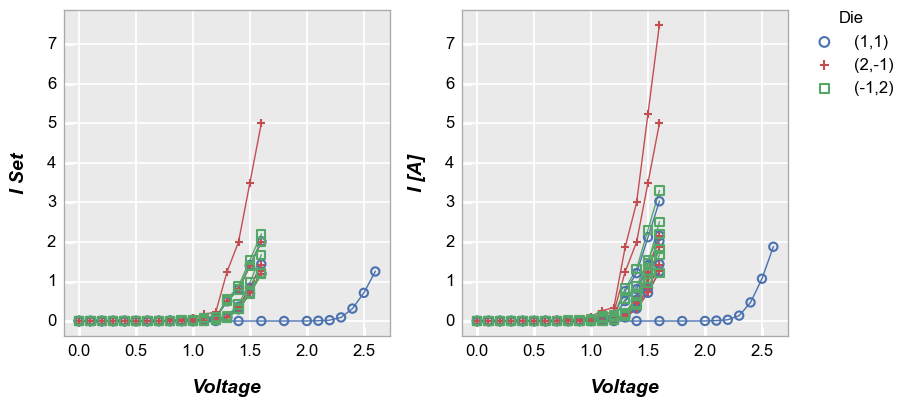

In [ ]:
fcp.plot(df1, x='Voltage', y=['I Set', 'I [A]'], legend='Die', wrap='y', groups=['Boost Level', 'Temperature [C]'],
         ax_size=[325, 325], filter='Substrate=="Si" & Target Wavelength==450')

Next, we replot the above data in an alternative style, with tick and label sharing disabled:

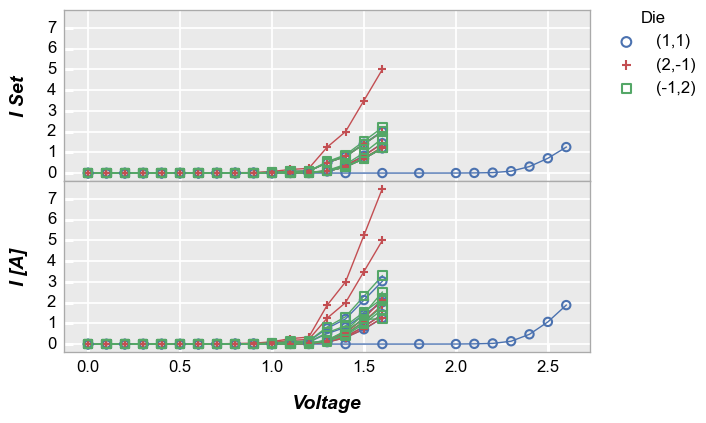

In [ ]:
fcp.plot(df1, x='Voltage', y=['I Set', 'I [A]'], legend='Die', wrap='y', groups=['Boost Level', 'Temperature [C]'],
         ax_size=[525, 170], filter='Substrate=="Si" & Target Wavelength==450', ncol=1, ws_row=0,
         separate_labels=False, separate_ticks=False)

## figure plots

To add another dimension of grouping, **fivecentplots** supports grouping by "figure".  This means a separate figure (i.e., a separate png) is created for each unique value in the DataFrame column(s) listed in kwarg ``fig_groups``.  Below, we will plot a unique figure for each value of the "Die" column.  We also enable the `save` command and the debug kwarg ``print_filename`` to show that we actually are getting a separate image for each plot (note we also explicitly call the `inline` keyword as well just so we can render the plots in this tutorial notebook):

I [A] vs Voltage by Temperature [C] _ Boost Level where Die=(-1,2).png


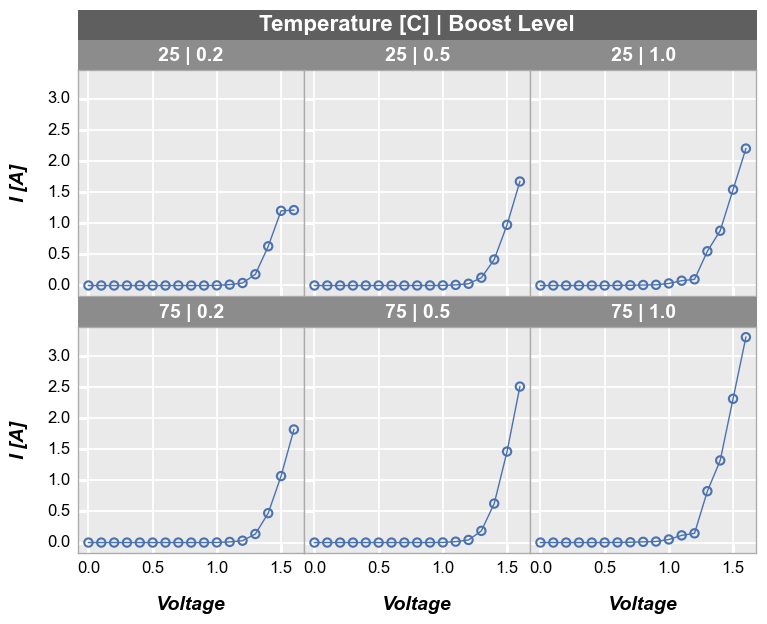

I [A] vs Voltage by Temperature [C] _ Boost Level where Die=(1,1).png


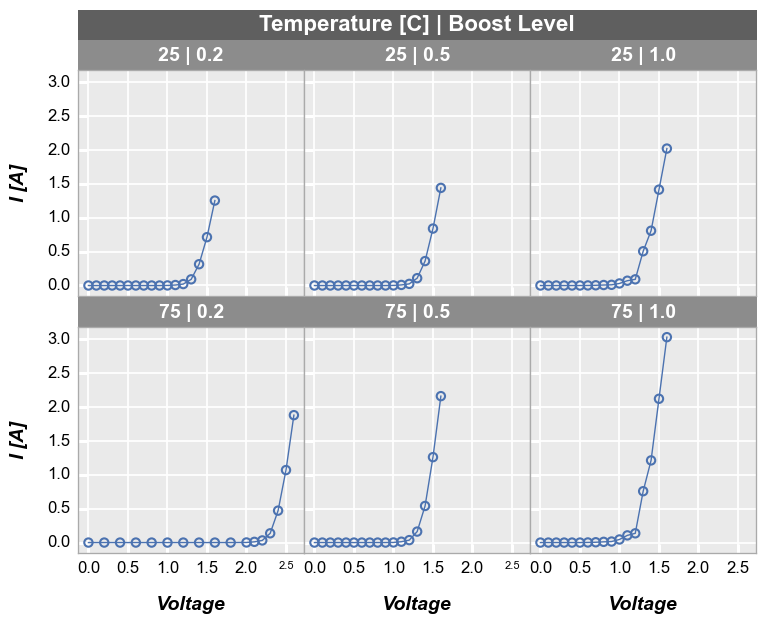

I [A] vs Voltage by Temperature [C] _ Boost Level where Die=(2,-1).png


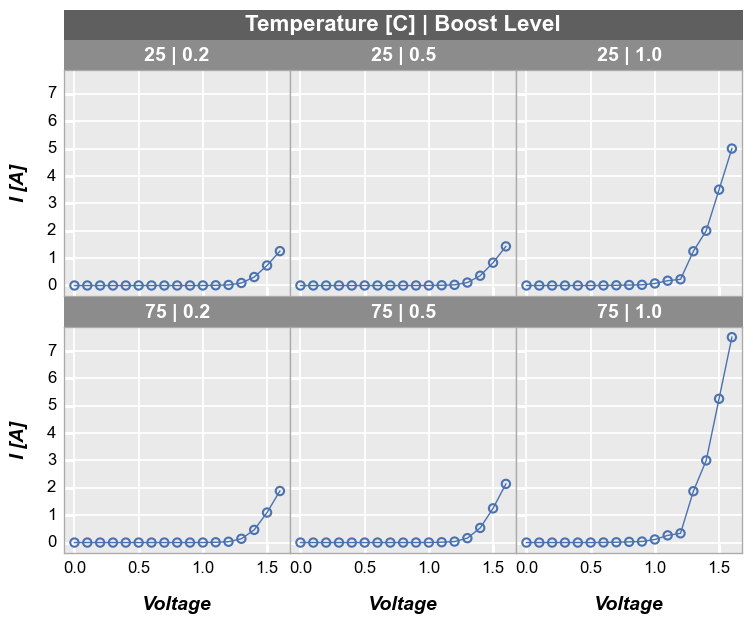

In [28]:
fcp.plot(df1, x='Voltage', y='I [A]', fig_groups='Die', wrap=['Temperature [C]', 'Boost Level'], save=True, inline=True,
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', print_filename=True)